  0%|          | 0/11965 [00:00<?, ?it/s]/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_89403/3936616379.py:28: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  arg=int(arg)
/var/folders/3t/dt29pzwn0vbbfncvrkg8lcl8g9q896/T/ipykernel_89403/3936616379.py:39: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  mainarg=int(np.argwhere(id==-i))
100%|██████████| 11965/11965 [00:01<00:00, 8568.43it/s]


32.3125


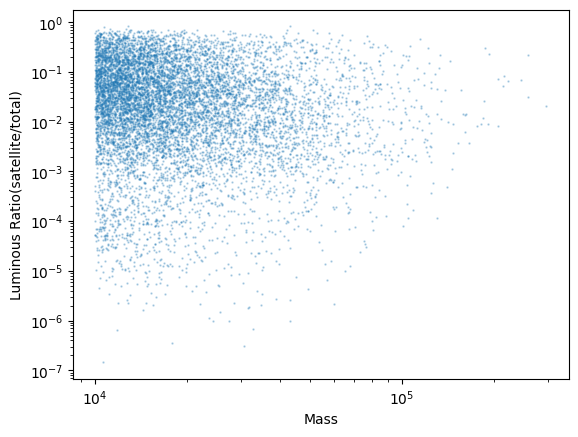

In [10]:
import numpy as np
import h5py
from tqdm import tqdm
import matplotlib.pyplot as plt
path="/Users/24756376/data/Flamingo/L1000N0900/"
f=h5py.File(path+'halos_ranked.hdf5','r')
N_g=np.array(f['N_g'])
id=np.array(f['id'])
mass=np.array(f['mass'])
f.close()
f=h5py.File(path+'particles_ranked.hdf5','r')
Xray=np.array(f['PartType0']['xray_lum_erosita_low'],dtype=np.float32)
f.close()
#Xray=np.ones(len(Xray),dtype=np.float32)
main_id=id[id<=0]
main_mass=mass[id<=0]
Rlum=np.zeros(len(main_id))
Rmass=np.zeros(len(main_id))
Ng_sub=np.zeros(len(main_id))
for i in tqdm(range(0,len(main_id))):
   subarg=np.argwhere((id>i)*(id<i+1)).astype(int)
#   N_sub[i]=len(subarg)
   subhalos=[]
   if len(subarg)==0:
      Rlum[i]=-1
      continue
   for arg in subarg:
      arg=int(arg)
      if N_g[arg]>0:
        id_s=int(np.sum(N_g[0:arg]))
        id_e=int(np.sum(N_g[0:arg+1]))
        lum=np.sum(Xray[id_s:id_e])
        subhalos.append(lum)
        Ng_sub[i]=len(subhalos)
   if subhalos!=[]:
     
     lum_sub=np.sum(subhalos)
     
     mainarg=int(np.argwhere(id==-i))
   
     lum_main=np.sum(Xray[int(np.sum(N_g[0:mainarg])):int(np.sum(N_g[0:mainarg+1]))])
    
     Rlum[i]=(lum_sub)/(lum_main+lum_sub)
plt.figure()
ax=plt.subplot(111)
ax.scatter(main_mass,Rlum,s=0.5,alpha=0.3)

ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("Mass")
ax.set_ylabel("Luminous Ratio(satellite/total)")
print(np.min(mass))

100%|██████████| 124849/124849 [00:02<00:00, 56053.31it/s]


1.0
[ 3169.05263158   119.23333333  8223.23076923  4460.33333333
  2805.375       6955.375       6800.25       11650.42857143
  3096.125       9312.33333333   526.30434783  1425.40909091
  1660.33333333  4734.23809524  7465.3         1500.17647059
  4939.2           84.44827586  9548.4        10233.33333333
  6696.33333333  3034.22222222  9063.45454545  8837.33333333
  9423.1         9952.25        4689.33333333  5778.44444444
  2591.30769231  6314.66666667  1510.375       6267.44444444
 11209.5         6677.55555556  8717.58333333  3890.66666667
  8721.42857143  8316.5         5984.81818182  9775.375
  7947.69230769  8492.25        9114.69230769 11535.5
 11054.2         1732.53846154  9555.75        6266.33333333
 10210.5         2391.36363636 11026.4         5818.64285714
 11614.625       4311.7         3363.38461538  8419.6
 10334.6         3147.45454545  9771.55555556  9906.6
 11467.33333333  2993.73913043  7961.63636364  6575.8
  5957.77777778  2363.5625     10475.72727273  7056.5

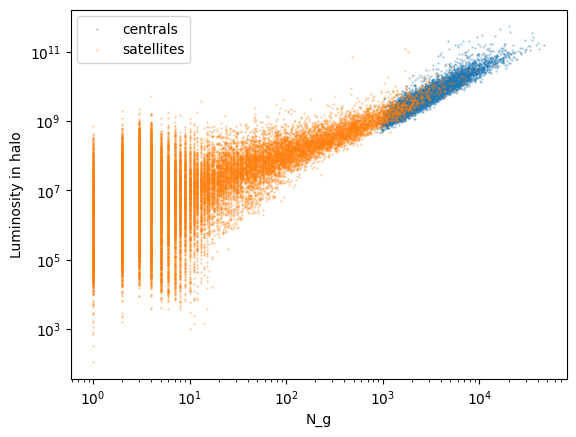

In [24]:
lum=np.zeros(len(id))
mg=np.zeros(len(id))
for i in tqdm(range(0,len(id))):
  
  lum[i]=np.sum(Xray[int(np.sum(N_g[0:i])):int(np.sum(N_g[0:i+1]))])
plt.figure()
ax=plt.subplot(111)
ax.scatter(N_g[id<=0],lum[id<=0],s=0.5,alpha=0.3,label="centrals")#,c=np.log10(N_g[id<=0]+1),cmap='viridis')
ax.scatter(N_g[id>0],lum[id>0],s=0.5,alpha=0.3,label="satellites")#,c=np.log10(N_g[id>0]),cmap='viridis')
ax.legend()
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("N_g")
ax.set_ylabel("Luminosity in halo")
print(np.min(N_g[N_g!=0]))
#print(id[(N_g==1)*(lum<10**3)])
print(id[(id>0)*(lum>0)*(lum<10**4)])

Text(0, 0.5, 'N subhalos')

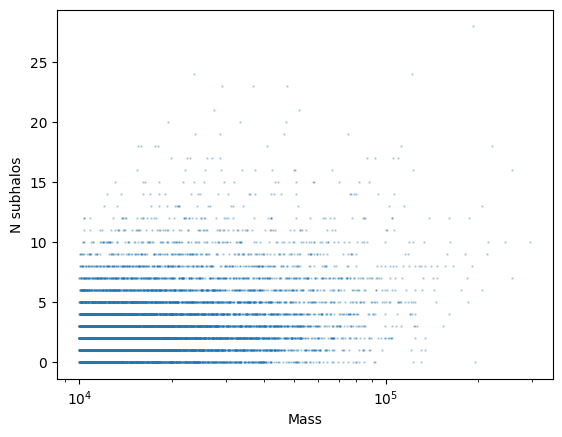

In [ ]:
plt.figure()
ax=plt.subplot(111)
ax.scatter(main_mass,Ng_sub,s=0.5,alpha=0.3)
ax.set_xscale("log")
#ax.set_yscale("log")
ax.set_xlabel("Mass")
ax.set_ylabel("N subhalos")

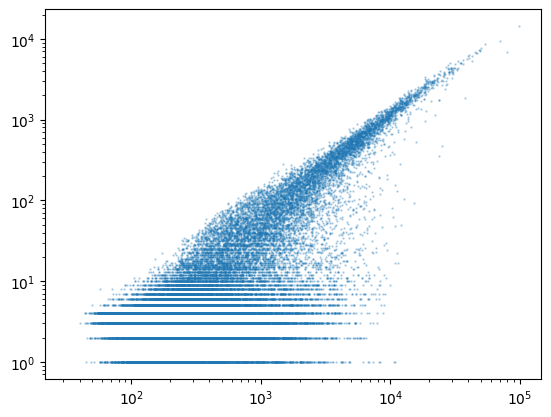

In [31]:
plt.figure()
ax=plt.subplot(111)
ax.scatter(mass[id>0],N_g[id>0],s=0.5,alpha=0.3)#,c=np.log10(lum[id>0]),cmap='viridis')
ax.set_xscale("log")
ax.set_yscale("log")


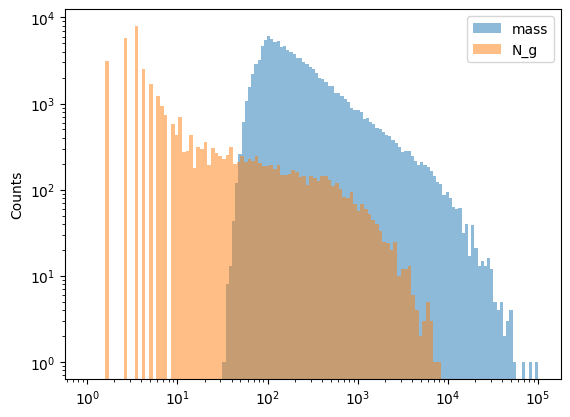

In [6]:
plt.figure()
ax=plt.subplot(111)
ax.hist(mass[id>=0],bins=10**np.linspace(1.5,5,100),alpha=0.5,label='mass')
ax.hist(N_g[id>=0]*0.86,bins=10**np.linspace(0,4,100),alpha=0.5,label='N_g')
ax.legend()
#ax.set_xlabel("Mass or N_g")
ax.set_ylabel("Counts")
ax.set_xscale("log")
ax.set_yscale("log")
